In [1]:
import requests as re
import json
import networkx as nx
import pandas as pd
from github import Github
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Extracting the information from the initial response

# def get_repos_contributors_list(data):
#     while(1):
#         if data["incomplete_results"]==True:
#             url_1 = "https://api.github.com/search/repositories?q=forks:%3E100000&sort=forks&order+desc"
#             response1 = re.get(url_1)
#             data = response1.json()
           
#     df1 = pd.DataFrame(columns=['repoName','repoAuthor','repoURL','forkCount', 'contributors'])   
    
#     for i in range (0,data['total_count'])):

    

## Repository under consideration (facebook/react)

### list of contributors

In [3]:
#the top rated repository
#http://gitmostwanted.com/

ACCESS_TOKEN = '4aa7a1c11cd00ec6d4255a9a9409007c9b6064ca'

#chosen user and the repo
USER = 'facebook'
REPO = 'facebook/react'

#Pygitgub object for further navigation
client = Github(ACCESS_TOKEN, per_page=100)
user = client.get_user(USER)
repo = client.get_repo(REPO)

#retrieve the list of contributors for REPO
contributors = [x for x in repo.get_contributors()]
print("Number of contributors: ",len(contributors))

#list of contributers
contributers_list = []
for c in contributors:
    contributers_list.append(c.login)
contributers_list 

Number of contributors:  432


['zpao',
 'gaearon',
 'bvaughn',
 'sophiebits',
 'sebmarkbage',
 'acdlite',
 'jimfb',
 'petehunt',
 'trueadm',
 'chenglou',
 'vjeux',
 'benjamn',
 'yungsters',
 'subtleGradient',
 'nhunzaker',
 'aweary',
 'syranide',
 'necolas',
 'cpojer',
 'flarnie',
 'koba04',
 'marocchino',
 'threepointone',
 'kohei-takata',
 'chicoxyzzy',
 'keyz',
 'mcsheffrey',
 'TheSavior',
 'bgw',
 'NE-SmallTown',
 'hellendag',
 'joshduck',
 'aickin',
 'jquense',
 'Daniel15',
 'iamdustan',
 'philipp-spiess',
 'Simek',
 'fisherwebdev',
 'fabiomcosta',
 'sompylasar',
 'jordwalke',
 'raphamorim',
 'arkist',
 'SimenB',
 'cody',
 'iamchenxin',
 'tomocchino',
 'lunaruan',
 'mroch',
 'graue',
 'ivanzotov',
 'kmeht',
 'DarkScorpion',
 'bhamodi',
 'RReverser',
 'leebyron',
 'lucasecdb',
 'fxxkscript',
 'yangshun',
 'AnSavvides',
 'andreypopp',
 'clemmy',
 'kassens',
 'jaredly',
 'joecritch',
 'Andarist',
 'raunofreiberg',
 'rickbeerendonk',
 'yiminghe',
 'zertosh',
 'camsong',
 'hzoo',
 'jgebhardt',
 'SanderSpies',
 'dit

### Constructing the graph between contributors for REACT repo (who follows whom)

In [4]:
#Directed graph
#creating a node with contributors
DG = nx.DiGraph()
for c in contributors:
    DG.add_node(c.login,type='user')   

In [5]:
#adding edges between contributors if followers relationship exist
for i in range (0,len(contributors)):
    followers_url = contributors[i].followers_url+'?access_token='+ACCESS_TOKEN
    response = re.get(followers_url)
    response = response.json()
    followers_list = []
    for j in range(len(response)):
        followers_list.append(response[j]['login'])
    for k in range(len(followers_list)):
        if followers_list[k] in contributers_list:
            DG.add_edge(followers_list[k], contributors[i].login,type='follows')

In [6]:
print(nx.info(DG))

Name: 
Type: DiGraph
Number of nodes: 432
Number of edges: 152
Average in degree:   0.3519
Average out degree:   0.3519


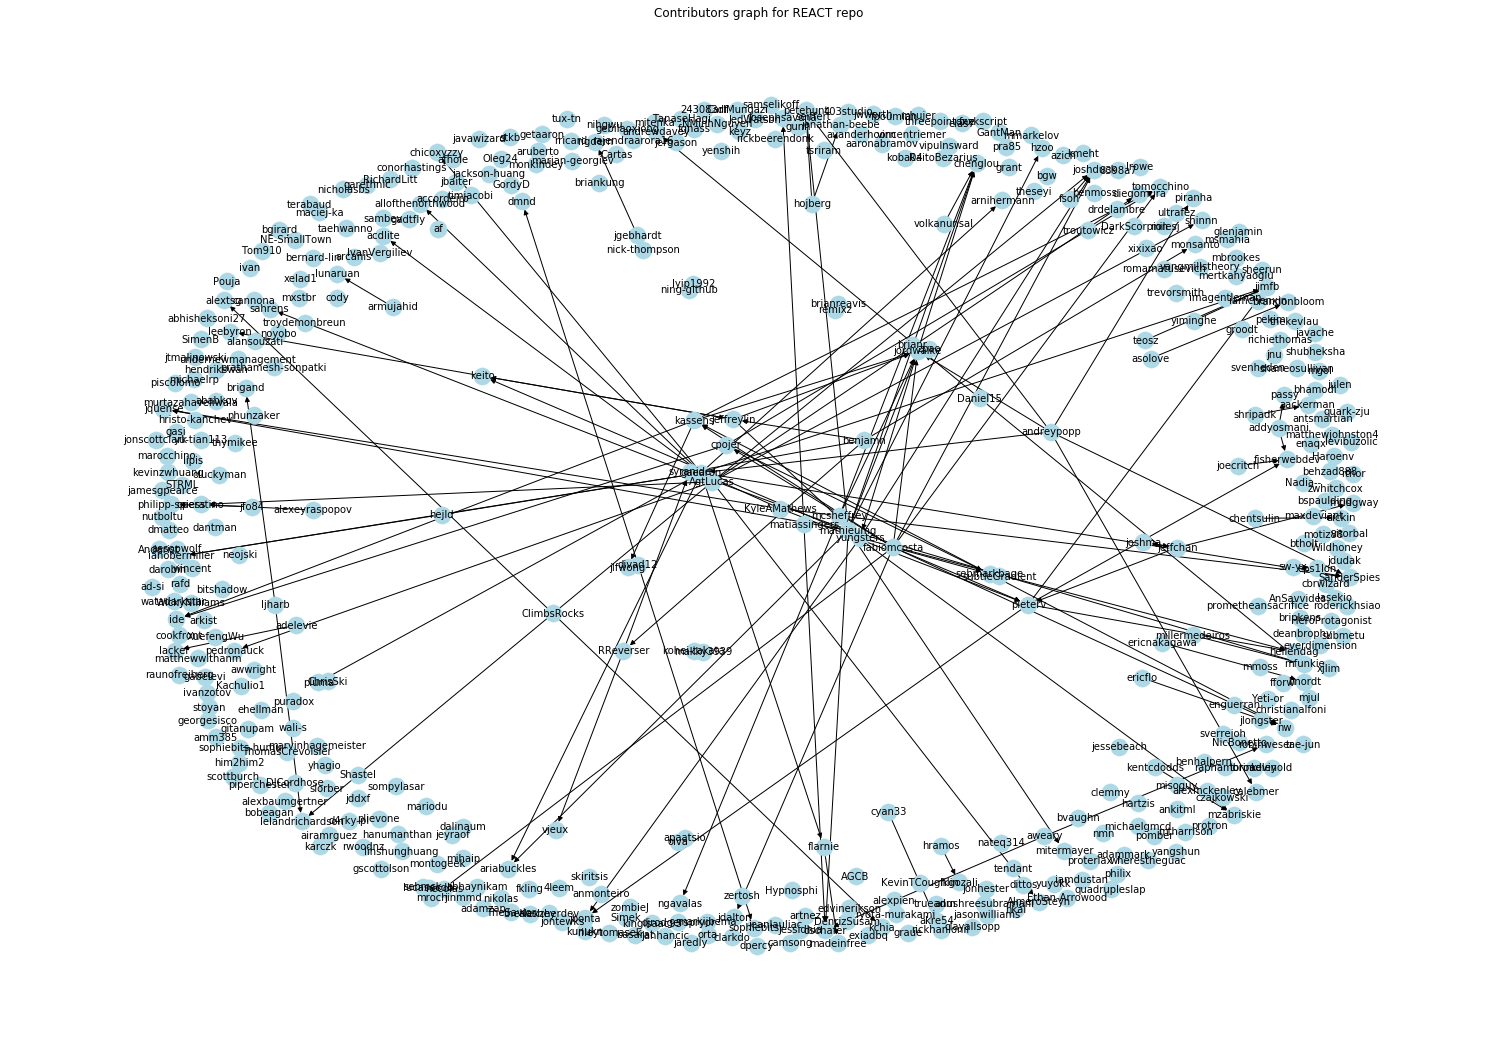

<Figure size 432x288 with 0 Axes>

In [7]:
plt.figure(figsize=(20,14))
nx.draw(DG, pos=nx.spring_layout(DG), node_color='lightblue',
    linewidths=0.25, font_size=10, font_weight='light', with_labels=True, dpi=2000)
plt.title('Contributors graph for REACT repo')
plt.show()
plt.savefig('contributors_network.svg', format='svg', dpi=1200)